### student academic performance data analysis

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

 <Basic information for data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 ent

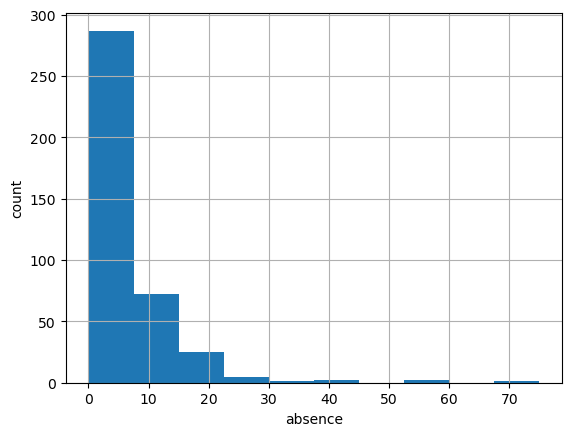

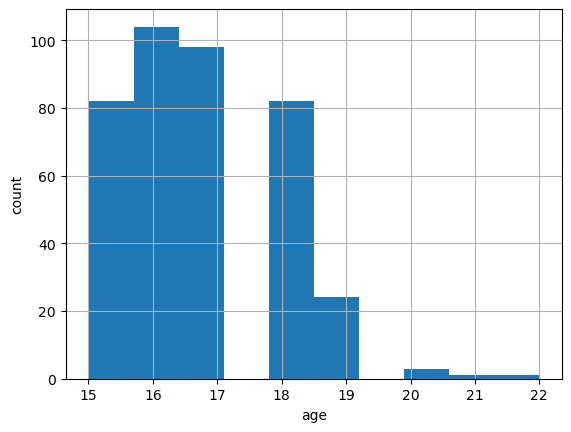


 <Technical Statistics Summary Information
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.29113

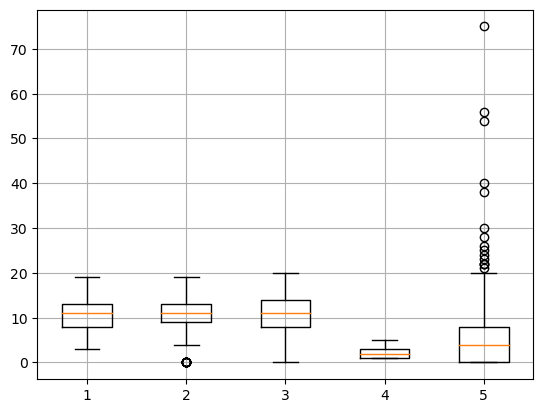


 <Coefficient of variation>
age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

 <Conariance>
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.628285 -0.228619 -0.226949    0.062873  -0.004434  0.231221   
Medu       -0.228619  1.198445  0.742717   -0.131061   0.059667 -0.192681   
Fedu       -0.226949  0.742717  1.184180   -0.120073  -0.008379 -0.202641   
traveltime  0.062873 -0.131061 -0.120073    0.486513  -0.059070  0.047844   
studytime  -0.004434  0.059667 -0.008379   -0.059070   0.704324 -0.108321   
failures    0.231221 -0.192681 -0.202641    0.047844  -0.108321  0.553017   
famrel      0.061717 -0.003842 -0.

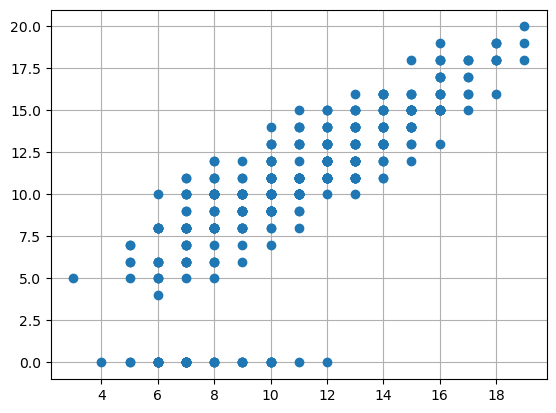

/Users/anbschool0032/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


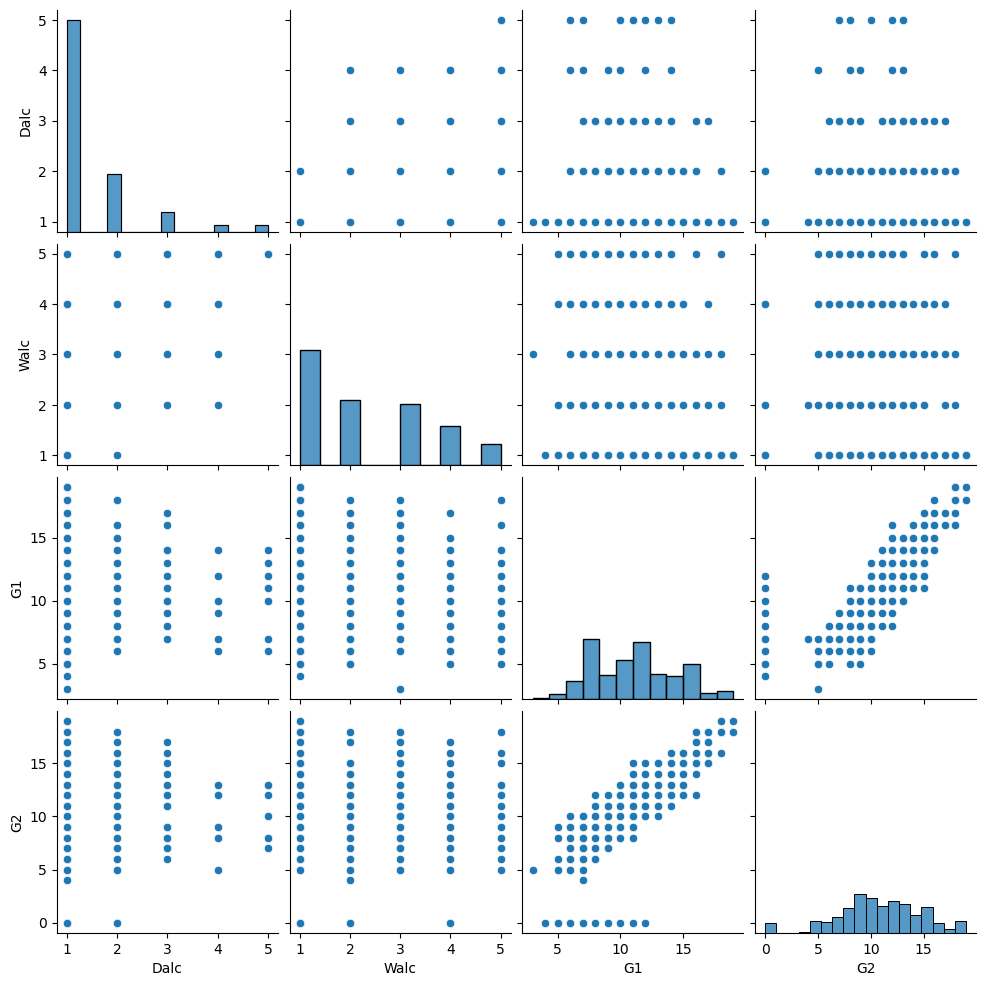

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-mat.csv', sep = ';')
print(student_data.head())

print('\n <Basic information for data>')
print(student_data.info())

print('\n <Missing data>')
print(student_data.isnull().sum())
print('\n => Total of missing data:', student_data.isnull().sum().sum())

plt.hist(student_data['absences'])
plt.xlabel('absence')
plt.ylabel('count')
plt.grid(True)
plt.show()

plt.hist(student_data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.grid(True)
plt.show()

print('\n <Technical Statistics Summary Information')
print(student_data.describe())
print("\n => The median of studytime:", student_data['studytime'].median())
print("\n => The mode of 'studytime':")
print(student_data['studytime'].mode())
print("\n => The variance of 'studytime':", student_data['studytime'].std())
print("\n => The standard deviation of 'studytime':", student_data['studytime'].std())

plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3'], \
             student_data['Walc'], student_data['absences']])
plt.grid(True)
plt.show()

print('\n <Coefficient of variation>')
cv = student_data.std(numeric_only = True) / student_data.mean(numeric_only = True)
print(cv)

print('\n <Conariance>')
print(student_data.cov(min_periods = None, ddof = 1, numeric_only = True))
print("\n => Covariance of grades in the first and third semesters:")
print(np.cov(student_data['G1'], student_data['G3']))
print("\n => variance on first-semester grades:", student_data['G1'].var())
print("\n => variance on third-semester grades:", student_data['G3'].var())

print('\n <Correlation coefficient>')
print(student_data.corr(numeric_only = True))

plt.plot(student_data['G1'], student_data['G3'], 'o')
plt.grid(True)
plt.show()

sns.pairplot(student_data[['Dalc', 'Walc', 'G1', 'G2']])
plt.grid(True)
plt.show()